In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
df = pd.read_csv('data_smart.csv', sep = ';', encoding = 'utf-8',engine='c')
df['timeInstant']= pd.to_datetime(df['timeInstant'])

df['timeInstant']= df['timeInstant'].map(datetime.toordinal)
#df["timeInstante"] = df['timeInstante'].apply(lambda d:datetime.strptime(d, '%d/%m/%y %H:%M:%S'))
df

,timeInstant,humidity,humiditySoil,temperature,Liga,HumidityIdeal
0,738244,73.0,92.26,27.90,0,50
1,738243,76.6,91.01,25.90,0,50
2,738242,92.2,83.98,25.32,0,50
3,738243,76.0,83.81,25.93,0,50
4,738159,88.0,8.57,20.40,1,50
...,...,...,...,...,...,...
373,738242,95.0,47.00,23.30,0,50
374,738242,95.0,48.00,23.50,0,50
375,738242,95.0,50.00,23.45,0,50
376,738242,95.0,50.00,23.60,0,50


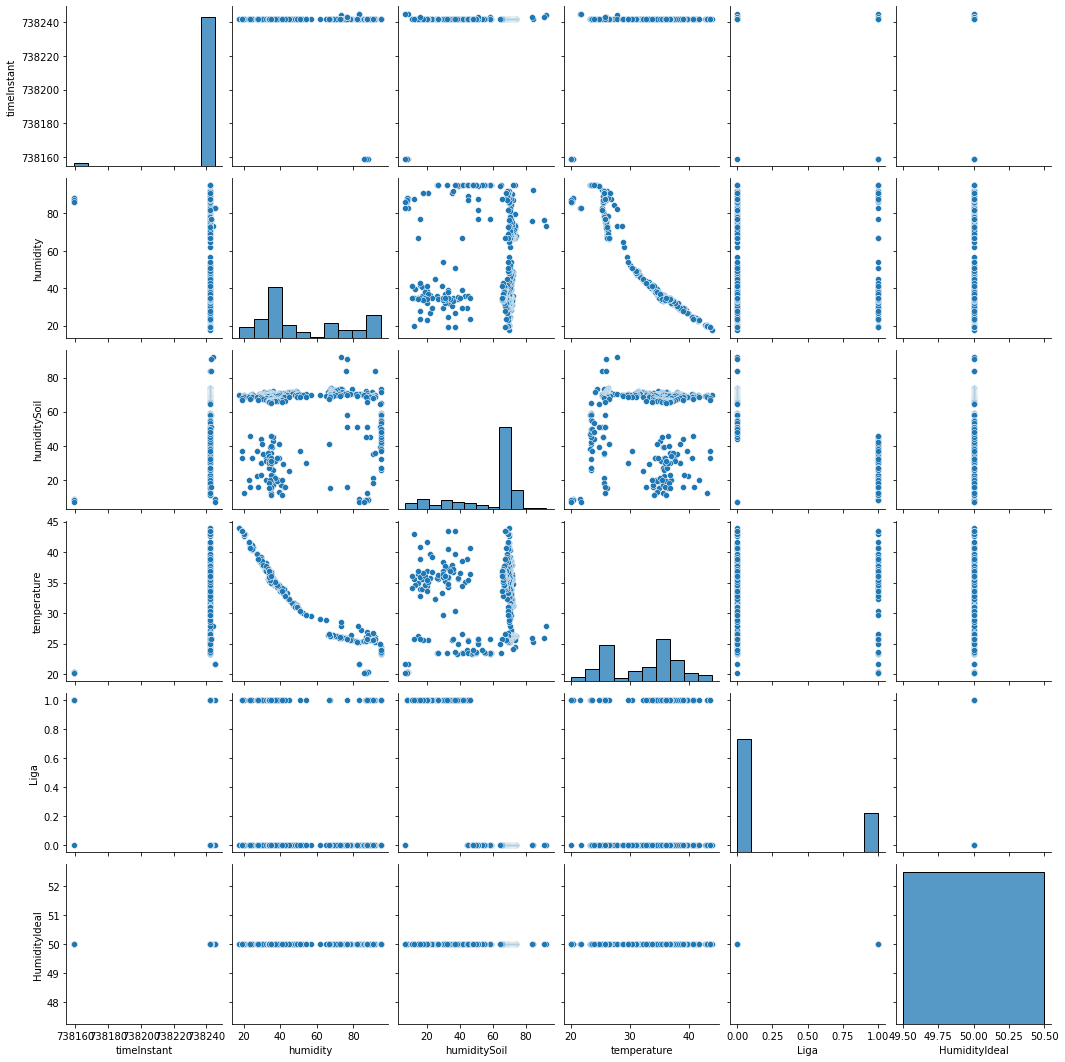

In [2]:
sns.pairplot(df)

<AxesSubplot:xlabel='humiditySoil', ylabel='humidity'>

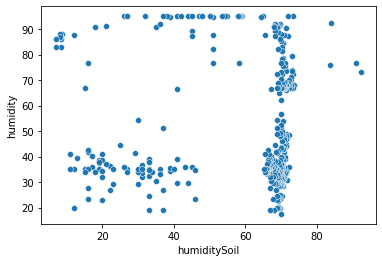

In [3]:
sns.scatterplot(x="humiditySoil",y="humidity",data=df)

<AxesSubplot:xlabel='humiditySoil', ylabel='HumidityIdeal'>

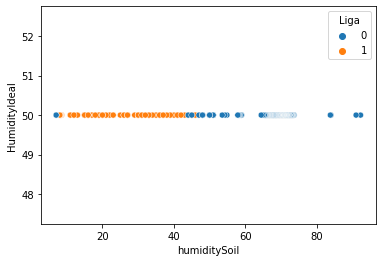

In [4]:
sns.scatterplot(x="humiditySoil",y="HumidityIdeal",data=df,hue="Liga")

<AxesSubplot:xlabel='humiditySoil', ylabel='humidity'>

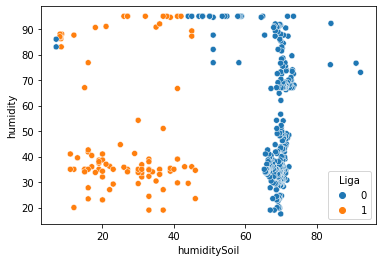

In [5]:
sns.scatterplot(x="humiditySoil",y="humidity",data=df,hue="Liga")

<AxesSubplot:xlabel='humiditySoil', ylabel='temperature'>

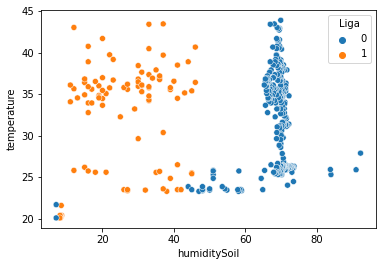

In [6]:
sns.scatterplot(x="humiditySoil",y="temperature",data=df,hue="Liga")

<AxesSubplot:xlabel='temperature', ylabel='humidity'>

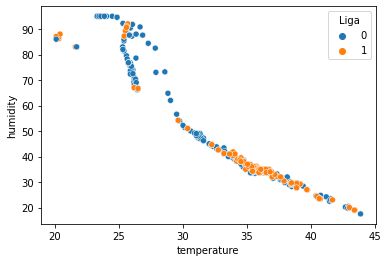

In [7]:
sns.scatterplot(x="temperature",y="humidity",data=df,hue="Liga")

In [8]:
#from sklearn.ensemble import  RandomForestClassifier

#modelo = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                       criterion='gini', max_depth=None, max_features='auto',
#                       max_leaf_nodes=None, max_samples=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=100,
#                       n_jobs=-1, oob_score=False, random_state=6654, verbose=0,
#                       warm_start=False)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = df [["timeInstant","humiditySoil","humidity","HumidityIdeal","temperature"]]
y = df["Liga"]

SEED = 1551

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)

modelo = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=SEED, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
modelo.fit(treino_x, treino_y)


LogisticRegression(max_iter=1000, random_state=1551)

In [10]:
previsoes = modelo.predict(teste_x)

In [11]:
previsoes_de_base = np.ones(len(teste_y))
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritimo de baseline foi  %.2f%%" % acuracia)

A acurácia do algoritimo de baseline foi  25.26%


<AxesSubplot:xlabel='humiditySoil', ylabel='HumidityIdeal'>

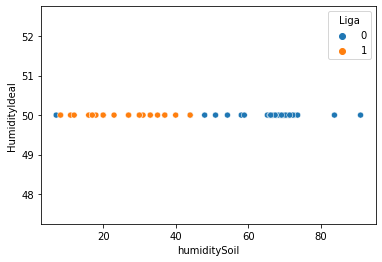

In [12]:
sns.scatterplot(x="humiditySoil",y="HumidityIdeal",data=teste_x,hue=teste_y)

<AxesSubplot:xlabel='humiditySoil', ylabel='humidity'>

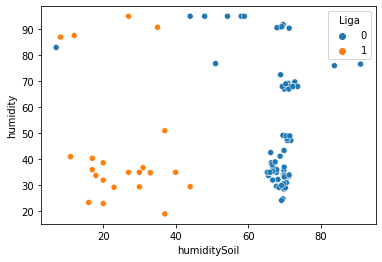

In [13]:
sns.scatterplot(x="humiditySoil",y="humidity",data=teste_x,hue=teste_y)

<AxesSubplot:xlabel='humiditySoil', ylabel='temperature'>

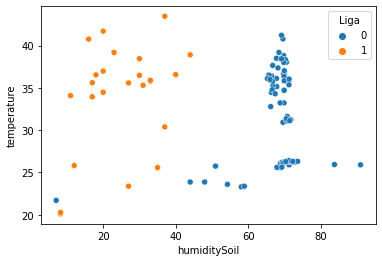

In [14]:
sns.scatterplot(x="humiditySoil",y="temperature",data=teste_x,hue=teste_y)

Text(0, 0.5, 'Y Estimado')

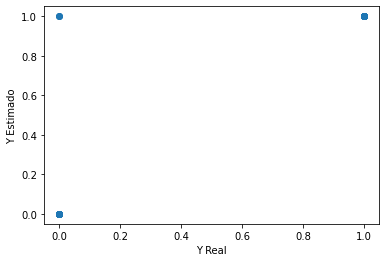

In [15]:

plt.scatter(teste_y,previsoes)
plt.xlabel('Y Real')
plt.ylabel('Y Estimado')

In [16]:
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 97.89%


In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(teste_y, previsoes))
print('MSE:', metrics.mean_squared_error(teste_y, previsoes))
print('RMSE:', np.sqrt(metrics.mean_squared_error(teste_y, previsoes)))

MAE: 0.021052631578947368
MSE: 0.021052631578947368
RMSE: 0.14509525002200233


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(teste_y,previsoes)


array([[69,  2],
       [ 0, 24]], dtype=int64)

In [19]:
from sklearn.metrics import f1_score
f1_score(teste_y,previsoes)

0.9600000000000001

In [20]:
umidadeSolo = 46

umidadeAmbiente = 60

temperaturaAmbiente = 20

umidadeIdeal = 50

horaLeitura = datetime.now().toordinal()

new_predict = np.array([horaLeitura,umidadeSolo, umidadeAmbiente, umidadeIdeal,temperaturaAmbiente]).reshape(1,-1)

predição = modelo.predict(new_predict)

if predição == 1 :
    print("Ligar o sistema")
else:
    print("Desligar/não Ligar o sistema")

Ligar o sistema


In [21]:
import joblib


In [22]:
joblib.dump(modelo,'model_smart.pkl')

['model_smart.pkl']